In [81]:
import pandas as pd
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
import numpy as np
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
import spacy
from IPython.display import clear_output
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import clear_output
from nltk.stem import WordNetLemmatizer
import itertools
from gensim.models.tfidfmodel import TfidfModel


ModuleNotFoundError: No module named 'polyglot'

In [45]:
#df=pd.read_csv('https://raw.githubusercontent.com/mkearney/trumptweets/master/data/trumptweets-1515775693.tweets.csv')
df=pd.read_csv('trump_tweets_of_interest.csv')
print(df.columns)


#filter=(df.hashtags.notnull()) & (df.hashtags!=None) & (df.hashtags.isin([
    #'MakeAmericaGreatAgain TRUMP',
#'DrainTheSwamp',
#'CrookedHiliary',
#'Debate2016',
#'WakeUpAmerica',
#'LieOfTheYear',
#'Israel',
#'Patriotic',
#'Snowden',
#'G7 NATO',
#'AfghanStrategy',
#'USA Japan',
#'AmericaFirst FamilyFirst',
#'CrookedHillary BigLeagueTruth DrainTheSwamp'
#]))
#df=df[filter]

#f.to_csv('trump_tweets_of_interest.csv')

#sns.countplot(x='hashtags', data=df)
filter=df['is_retweet']==False
df=df[filter]


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'status_id',
       'created_at', 'user_id', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favorite_count',
       'retweet_count', 'hashtags', 'symbols', 'urls_url', 'urls_t.co',
       'urls_expanded_url', 'media_url', 'media_t.co', 'media_expanded_url',
       'media_type', 'ext_media_url', 'ext_media_t.co',
       'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id',
       'mentions_screen_name', 'lang', 'quoted_status_id', 'quoted_text',
       'quoted_created_at', 'quoted_source', 'quoted_favorite_count',
       'quoted_retweet_count', 'quoted_user_id', 'quoted_screen_name',
       'quoted_name', 'quoted_followers_count', 'quoted_friends_count',
       'quoted_statuses_count', 'quoted_location', 'quoted_description',
       'quoted_verified', 'retweet_status_id', 'retweet_text',
       'retweet_create

In [46]:
nlp = spacy.load('en_core_web_sm')
stopwords=spacy.lang.en.stop_words.STOP_WORDS
    
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
p = re.compile(TOKENS_ALPHANUMERIC)
#nlp = spacy.load('en_core_web_sm')

search_list=[
'clinton',
'korea',
'isis',
'israel',
'obama',
'health',
'snowden',
'hillary',
'crooked',
'RADICAL',
'WikiLeaks',
'corruption',
'biden',
'families',
'family',
'economic',
'Mexico',
'Wall',
'education',
'epa',
'insurance',
'medicare',
'parenthood',
'refugees',
'exploration',
'justices',
'military',
'terrorist',
'afghanistan',
'iran',
'generals',
'veterns',
'china',
'jobs',
'trade',
'taxes',
'debt',
'dodd-frank',
'manufacturing',
'steel',
'auto',
'miniumum',
'relief',
'corporate',
'budget',
'regulation'
'immigration'
'cybersecurity',
'energy',
'abortion',
'guns',
'WakeUpAmerica',
'japan',
'LieOfTheYear',
'oil',
'pipeline'
   
#'book'
]
word_list=[]
stop_words=['nan','tinyurl','http','com','cont','t','co','https']
exclude_found=['hotroddergirl','vote','MATTER','BonnieKit','purpleheartwife'
    'Foshay504','scorpio5053'
]
df['sentiment_polarity']=0
df['sentiment_subjectivity']=0
df['sentence']=np.nan
df['found_flag']=0
clear_output(wait=True)
for key,item in df[['text','hashtags','retweet_text']].iterrows():
    str_buffer=item.text.replace(" it's "," it is ")
    str_buffer=str_buffer.replace(" won't "," will not ")
    str_buffer=str_buffer.replace(" don't "," do not ")
    str_buffer=str_buffer.replace(" aren't "," are not ")
    str_buffer=str_buffer.replace(" would't "," would not ")
    str_buffer=str_buffer.replace(" didn't "," did not ")
    str_buffer=str_buffer.replace(" you're "," you are ")
    str_buffer=str_buffer.replace(" I'm "," i am ")
    str_buffer=str_buffer.replace(" they're "," they are")
    str_buffer = re.sub(r'[^\w\s]', ' ', str_buffer) 
    
    word_list=nltk.word_tokenize(str_buffer)
    #word_list=p.findall(str_buffer)

    for word in list(word_list):  # iterating on a copy since removing will mess things up
        if word in stop_words:
            word_list.remove(word)
        
    sentence=' '.join(word_list)
    for word in word_list:
        if word in search_list:
            if word not in exclude_found:
                df.loc[key,'found_flag']=1
                #print(sentence+'\n\n')
            break
            


    #doc=nlp(sentence)
    #tokens=[token.text for token in doc]

    #lemmas =[token.lemma_ for token in doc]
    #lemmas =[lemma for lemma in lemmas
    #    if (lemma.isalpha() )
    #     and lemma not in stopwords
    #    ]
    #sentence2=' '.join(lemmas)
    #print(sentence2)

    my_valance=TextBlob(sentence)
    df.loc[key,'sentence']=sentence
    #df.loc[key,'sentence2']=sentence2
    df.loc[key,'sentiment_polarity']=my_valance.sentiment.polarity
    df.loc[key,'sentiment_subjectivity']=my_valance.sentiment.subjectivity
    #print("1.{}\n2.{}".format(df.loc[key,'sentence'],df.loc[key,'text']))

pd.options.display.max_colwidth = 100
print("Sentiment Polarity above .5 is positive and subjectivity above .5 is probably not public and not factual\n\n")
filter=df['found_flag']==1
filter=filter & ((df['sentiment_polarity']<0.25) & (df['sentiment_polarity']>0)) | (df['sentiment_polarity']>0.85)

for key,item in df[filter][['hashtags','text','sentence','sentiment_polarity','sentiment_subjectivity']].iterrows():
    print("{} {} {} {}\n".format(item.hashtags,item.sentence,item.sentiment_polarity,item.sentiment_subjectivity))
    

df=df[filter]    



Sentiment Polarity above .5 is positive and subjectivity above .5 is probably not public and not factual


nan Tonight I trade places with Larry King kingsthings and interview him on the 25th anniversary of his show 9PM on CNN featuring best clips 1.0 0.3

nan The Keystone pipeline will create 20 000 jobs and lower gas prices But Obama says No Dumb 0.1875 0.5

nan The safest way to preserve Medicare is with a robust and vibrant economy We should lower corporate and capital gain taxes immediately 0.08333333333333333 0.16666666666666666

TimeToGetTough The thing about high corporate tax rates is that in the end companies aren the ones who foot the bill consumers do TimeToGetTough 0.08 0.26999999999999996

nan Third quarter GDP was lowered to 2 There will not be any economic recovery until BarackObama is defeated 0.1 0.1

nan The new job figures do not include 315 000 people who have given up looking for jobs 0.13636363636363635 0.45454545454545453

nan The Super Committee is finding ways

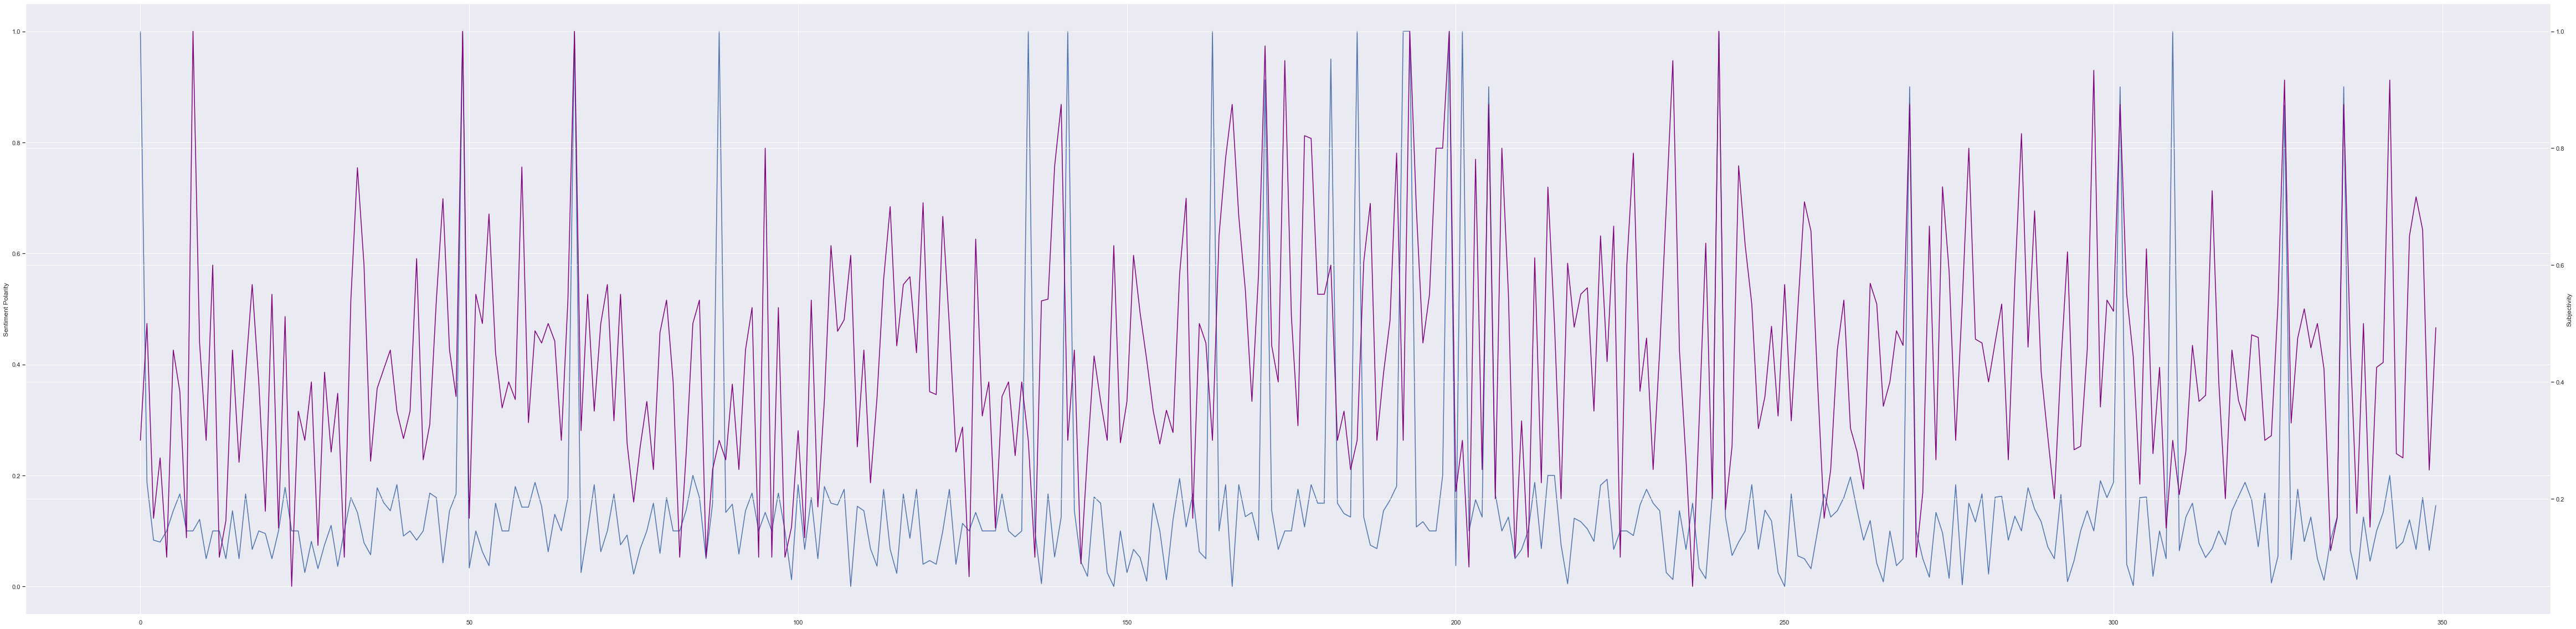

In [47]:
#df.to_csv('trump_tweets_of_interest.csv')
sns.set(rc={'figure.figsize':(81.7,20.27)})
x=np.arange(len(df))
y=df['sentiment_polarity']
fig, ax= plt.subplots()
ax.plot(x,y)
plt.ylabel('Sentiment Polarity')
ax2=ax.twinx()
y=df['sentiment_subjectivity']
ax2.plot(x,y,color='purple')
ax2.set_ylabel('Subjectivity')
plt.show()

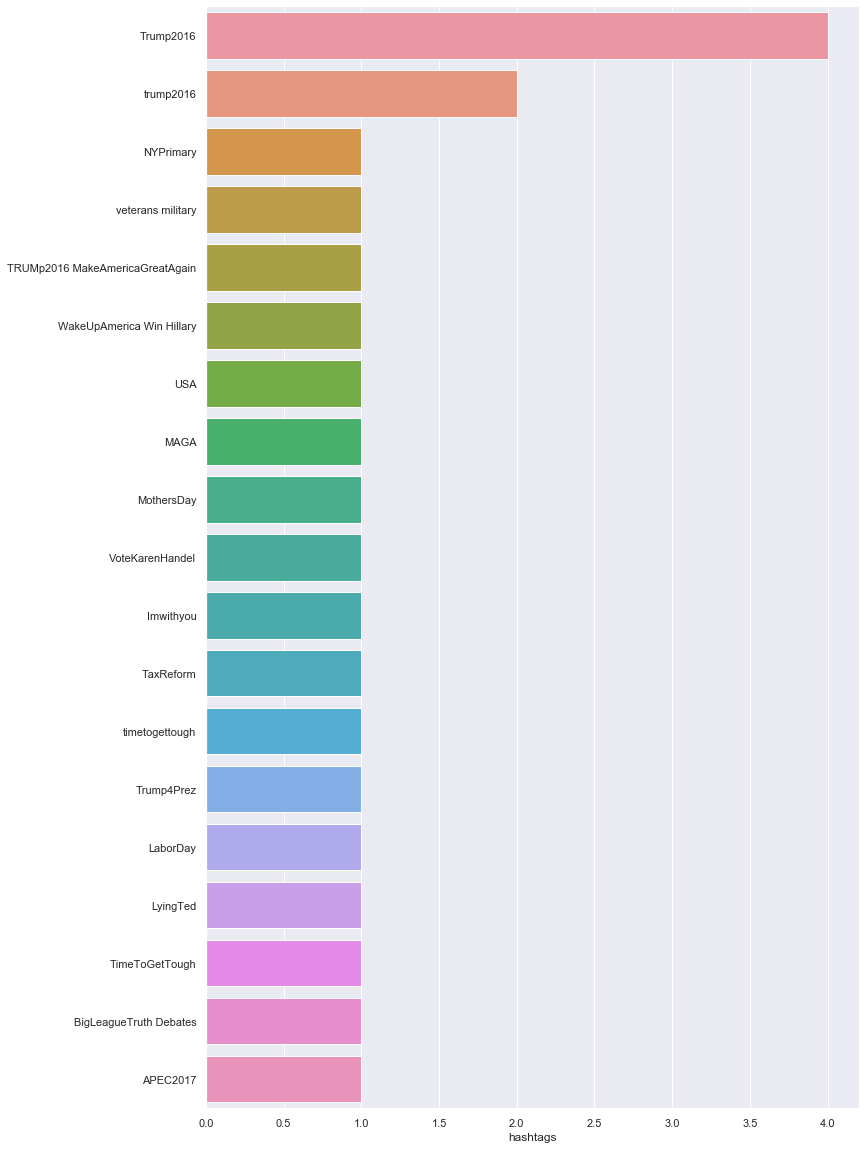

In [48]:
sns.set(rc={'figure.figsize':(11.7,20.27)})
sns.barplot(y=df.hashtags.value_counts().index, x=df.hashtags.value_counts())
    
LABELS=['hashtags']


In [49]:
def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar sentences
    sim_scores = sim_scores[1:4]
    # Get the movie indices
    sentence_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return df['sentence'].iloc[sentence_indices]
def normalized_term_frequency(word, document):

    raw_frequency = document.count(word)

    if raw_frequency == 0:

        return 0

    return 1 + math.log(raw_frequency)

def docs_contain_word(word, documents):

    counter = 0

    for document in list_of_documents:

        if word in document:

            counter+=1

    return counter



def get_vocabulary(documents):

    vocabulary = set([word for document in documents for word in document])	

    return vocabulary



def inverse_document_frequency(documents, vocabulary):

    idf = {}

    for word in vocabulary:

        contains_word = docs_contain_word(word, documents)

        idf[word] = 1 + math.log(len(documents)/(contains_word))
    return idf

def tf_idf(search_keys, dataframe, label):

    tfidf_vectorizer = TfidfVectorizer()
    
    #fit_transform method converts the given text into TF-IDF scores for all the documents. 

    tfidf_weights_matrix = tfidf_vectorizer.fit_transform(dataframe.loc[:, label])

    search_query_weights = tfidf_vectorizer.transform([search_keys])


    return search_query_weights, tfidf_weights_matrix

def cos_similarity(search_query_weights, tfidf_weights_matrix):


    cosine_distance = cosine_similarity(query, tfidf_matrix)

    similarity_list = cosine_distance[0]

  
    return similarity_list

def most_similar(similarity_list, min_talks=1):

    most_similar= []

  

    while min_talks > 0:

        tmp_index = np.argmax(similarity_list)

        most_similar.append(tmp_index)

        similarity_list[tmp_index] = 0

        min_talks -= 1

    return most_similar

def word_count(string) :
    words= string.split()
    return len(words)


def avg_word_length(x):
    words=x.split()
    word_lengths= [len(word) for word in words]

    avg_word_length= sum(word_lengths)/len(words)
    return(avg_word_length)

def create_tokenizer_score(new_series, train_series, tokenizer):
    """
    return the tf idf score of each possible pairs of documents
    Args:
        new_series (pd.Series): new data (To compare against train data)
        train_series (pd.Series): train data (To fit the tf-idf transformer)
    Returns:
        pd.DataFrame
    """

    train_tfidf = tokenizer.fit_transform(train_series)
    new_tfidf = tokenizer.transform(new_series)
    X = pd.DataFrame(cosine_similarity(new_tfidf, train_tfidf), columns=train_series.index)
    X['ix_new'] = new_series.index
    score = pd.melt(
        X,
        id_vars='ix_new',
        var_name='ix_train',
        value_name='score'
    )
    return score

In [50]:
#print(df)
df['word_count']=df['sentence'].apply(word_count)
df['avg_word_length']=df['sentence'].apply(avg_word_length)
#print(df.head())
#print(df.shape)

a_sentence="Mexican leaders and negotiators are much tougher and smarter than those of the U S Mexico is killing us on jobs and trade"
print("SELECTED SENTENCE: " + a_sentence)


print(a_sentence)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['sentence'])
# Convert matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())
# Map the column names to vocabulary 
tfidf.columns = tfidf.get_feature_names()

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


df2=pd.DataFrame()
#indices=np.arange(0,len(sentences))
df2['Sentence']=df['sentence']

indices = pd.Series(df2.index, index=df2['Sentence']).drop_duplicates()
#results=get_recommendations(a_sentence,cosine_sim,indices)
#for result in enumerate(results):
#       print (result)

SELECTED SENTENCE: Mexican leaders and negotiators are much tougher and smarter than those of the U S Mexico is killing us on jobs and trade
Mexican leaders and negotiators are much tougher and smarter than those of the U S Mexico is killing us on jobs and trade


In [51]:
clear_output(wait=True)
print('This section will show similar sentences together')
sentences=df['sentence']

train_set=pd.Series(sentences)

#for match_index in np.arange(len(sentences)):
match_index=0
for sentence in sentences:
    test_set=pd.Series(sentence)
    #print('\n\n{}***Sentence****\n{}'.format(match_index,sentences[match_index]))
    print('\n\n{}***Sentence****\n{}'.format(match_index,sentence))

    tokenizer = TfidfVectorizer() # initiate here your own tokenizer (TfidfVectorizer, CountVectorizer, with stopwords...)
    score = create_tokenizer_score(train_series=train_set, new_series=test_set, tokenizer=tokenizer)
    #print(score)
    index=0
    matches=[]

    for index in np.arange(0,len(score)):

        value=score.loc[index,'score']
        #print (index,value)
        if (value>0.20) & (index!=match_index) :
            matches.append(index)
            print("\n*",sentences.iloc[index])
            #matches.append(index)
            
    match_index+=1
        
#print(matches)

This section will show similar sentences together


0***Sentence****
Tonight I trade places with Larry King kingsthings and interview him on the 25th anniversary of his show 9PM on CNN featuring best clips


1***Sentence****
The Keystone pipeline will create 20 000 jobs and lower gas prices But Obama says No Dumb

* Gas prices are still too high We really need to pressure OPEC to lower the price of oil

* Keystone must be approved through Congress BarackObama is costing America over 20 000 jobs and driving the price of gas high

* Keystone pipeline would create 20 000 direct jobs another 50 000 jobs servicing the pipeline 700 000 barrels a oenlVsr8

* OPEC has just raised oil to over 102 Barrel And BarackObama still will not approve the Keystone Pipeline Does he want high gas prices

* Will the Keystone XL pipeline finally be approved Will create over 100 000 jobs and make us more energy independent

* So sad that Obama rejected Keystone Pipeline Thousands of jobs good for the environm


* Sir_JamesM Mr realDonaldTrump I admire your determination so much my best wishes to you and your family Thank you

* Come on DannyZuker take the bet show your friends and family amp your bosses on Modern Family that you are not chicken shit


35***Sentence****
Brits spent 57 8M on the royal family Obamas cost us 1 4B in expenses including entertainment G2Nvr2ZH Living large on us


36***Sentence****
Obama deserves much less credit for the killing of Bin Laden The praise goes to our brave military and intelligence officers

* The military and Navy Seals should be given more credit for Bin Laden s death not Obama who works hard to take Awn3F7tS


37***Sentence****
Where is the main stream media reporting on Univision s new expose of Fast and Furious Too busy looking at Mitt s taxes


38***Sentence****
After BarackObama s speech tonight which should be well delivered reality will hit Friday morning when the new jobs report is released

* A day after BarackObama released a trillion doll



71***Sentence****
Congratulations to BarackObama for being reckless In his first 38 months in office the debt has grown at a rate that is unthinkable

* Our national debt has grown by 30 and a gallon of gas has doubled so far under BarackObama He is a disaster


72***Sentence****
Coincidence More than half of BarackObama s 47 biggest fundraisers have been given administration jobs JJqEe6tM


73***Sentence****
The Fed is considering issuing even more US bond debt into the market Not good

* The Fed is destroying the dollar When inflation hits the economy then even more jobs will go overseas


74***Sentence****
Iran s threats are no excuse for the 9 month high price of oil OPEC is ripping us off while BarackObama watches wYSTMETc

* Gas prices are still too high We really need to pressure OPEC to lower the price of oil

* Why is oil at a record high OPEC amp the oil speculators continue to rip us off

* The new reality China s demand for oil now controls the market lqKTTsyCoQ And OPEC 


* Upstate New York needs jobs Frack Now amp Frack Fast Pay off NY State debt


98***Sentence****
E_Chenault07 If realDonaldTrump was just in charge of our countries economic decisions we would be back on track


99***Sentence****
Oil has been over 33 gallon for 34 months A new record And now with Obama s war on coal American families will be hit even harder


100***Sentence****
BordenRhodes realDonaldTrump can close the economic racial and political divisions in America That is true


101***Sentence****
Bashar Assad is stronger today than he was before Obama threatened military action Obama really bungled this

* Our military is building and is rapidly becoming stronger than ever before Frankly we have no choice


102***Sentence****
Why is oil at a record high OPEC amp the oil speculators continue to rip us off

* If China had a tenth of the natural resources we do then they would already be energy independent Instead we continue to buy oil from OPEC

* US Gov is on the hook for more 


* To be a big success in any field you need to build momentum Momentum is all about energy and timing Think BIG


136***Sentence****
Joseph Kennedy is really being used by Venezuela and Hugo C in oil commercial


137***Sentence****
So far he has been a complete failure at doing so He should read The Art of the Deal and use his energy to focus on a new career

* Our national debt has grown by 30 and a gallon of gas has doubled so far under BarackObama He is a disaster

* JebBush is a low energy stiff who should focus his special interest money on the many people ahead of him in the polls Has no chance


138***Sentence****
Will the Keystone XL pipeline finally be approved Will create over 100 000 jobs and make us more energy independent

* The Keystone pipeline will create 20 000 jobs and lower gas prices But Obama says No Dumb

* Keystone must be approved through Congress BarackObama is costing America over 20 000 jobs and driving the price of gas high

* Keystone pipeline would create



175***Sentence****
Isn it ironic that China is going all in nuclear for energy while at the same time making wind turbines for others alexsalmond


176***Sentence****
Obama through his cronies said the Keysyone pipeline was not political how much can one man lie about even the most obvious things


177***Sentence****
China is closing a massive oil deal w Russia taking advantage of the Ukraine conflict tItkQ0PmZH Smart unlike our leaders

* A classic China just signs massive oil and gas deal with Russia giving Russia plenty of ammo to continue laughing in U S face


178***Sentence****
DenZen Successful people work their asses off to make it only to be punished by heavy taxes which are then squandered recklessly


179***Sentence****
tiffanypearls realDonaldTrump I want to work on The Donald s campaign He is the only candidate worth the energy trump2016

* 4kmiddlebrook realDonaldTrump WakeUpAmerica Donald s Policies are the Real Game Plan to Win He s also the only 1 to beat Hillary

* 


* The more you learn about the debt deal the worse it gets

* With these record high gas prices what does it say about Obama that he was trying to brag about his energy policy in the debate

* Ailor424 realDonaldTrump Prez shows more anger about US Senate not passing guns bill than he does about the Boston bombing Interesting


216***Sentence****
purpleheartwife realDonaldTrump you have some military caregivers in FL ready to back you sherrimarie73 Thanks call Corey


217***Sentence****
The Trans Pacific Partnership will increase our trade deficits amp send even more jobs overseas This is a bad deal Time for smart trade

* The Fed is destroying the dollar When inflation hits the economy then even more jobs will go overseas

* The American worker is being victimized by our trade policies We need smart trade which can only be accomplished by smart dealmakers


218***Sentence****
2014_vince realDonaldTrump all planet earth wants the deal king trump to clean up the bush obama mess Wow it 


* Many of the great jobs that the people of our country want are long gone shipped to other countries We now are part time sad I WILL FIX


254***Sentence****
The trade deficit rose to a 7yr high thanks to horrible trade policies Clinton supports I will fix it fast JOBS jaGeN4u50U

* Our trade deficit just jumped in May to the second highest level on record aENXRcvMWg FAIR trade not free trade I TOLD YOU


255***Sentence****
Obama Clinton inherited 10T in debt and turned it into nearly 20T They have bankrupted 1COtt0RPY7


256***Sentence****
SC has kept us safe from exec amnesty for now But Hillary has pledged to expand it taking jobs from Hispanic amp African American workers

* Crooked Hillary will NEVER be able to solve the problems of poverty education and safety within the African American amp Hispanic communities


257***Sentence****
mariadaq HISTORIC what s historic is OUR national debt record unemployment amp pocketbook crisis THE PEOPLE NEED TRUMP2 make USA RICH


258***Sente


* Mitt s proposed tax cuts for the middle class will spur record economic growth

* On Taxes This is the biggest corporate rate cut ever going back to the corporate income tax rate of roughly 80 years ago This is a huge pro growth stimulus for the economy Every year the Obama WH overstated how the economy would grow Now real economics and jobs WSJ Report


292***Sentence****
This week the Senate can join the House amp take a strong stand for the Middle Class families who are the backbone of America Together we will give the American people a big beautiful Christmas present a massive tax cut that lets Americans keep more of their HARD EARNED MONEY 9jddEW2Oo5

* I am proud of the Rep House amp Senate for working so hard on cutting taxes amp reform We re getting close Now how about ending the unfair amp highly unpopular Indiv Mandate in OCare amp reducing taxes even further Cut top rate to 35 w all of the rest going to middle income cuts

* This is the right TAX CUT the RIGHT TIME We wil



319***Sentence****
Our new American Energy Policy will unlock MILLIONS of jobs amp TRILLIONS in wealth We are on the cusp of a true energy REVOLUTION Up9WkJnYgw

* Today we gathered in the Roosevelt Room for one single reason to CUT THE RED TAPE For many decades an ever growing maze of regs rules and restrictions has cost our country trillions of dollars millions of jobs countless American factories amp devastated entire industries ostXOVnckf


320***Sentence****
From my first day in office we ve taken swift action to lift the crushing restrictions on American energy Remarks Z8B95LWld5 LMhTUQr50A


321***Sentence****
At some point the Fake News will be forced to discuss our great jobs numbers strong economy success with ISIS the border amp so much else

* Wisconsin s economy is doing poorly and like everywhere else in U S jobs are leaving I will make our economy strong again bring in jobs


322***Sentence****
Mexico was just ranked the second deadliest country in the world after only

In [80]:
stopwords=spacy.lang.en.stop_words.STOP_WORDS
print('Spacy most common words in each sentence')
for sentence in sentences:
    tokens=word_tokenize(sentence)
    lower_tokens = [token.lower() for token in tokens if (len(token)>3) & ((token in stopwords)==False) ]
 
    wordnet_lemmatizer = WordNetLemmatizer()

    # Lemmatize all tokens into a new list: lemmatized
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in lower_tokens]

    counter=Counter(lemmatized)
    print(counter.most_common(3))

Spacy most common words in each sentence
[('tonight', 1), ('trade', 1), ('place', 1)]
[('keystone', 1), ('pipeline', 1), ('create', 1)]
[('safest', 1), ('preserve', 1), ('medicare', 1)]
[('thing', 1), ('high', 1), ('corporate', 1)]
[('third', 1), ('quarter', 1), ('lowered', 1)]
[('figure', 1), ('include', 1), ('people', 1)]
[('super', 1), ('committee', 1), ('finding', 1)]
[('october', 1), ('foreclosure', 1), ('increase', 1)]
[('national', 1), ('debt', 1), ('grown', 1)]
[('china', 1), ('military', 1), ('buildup', 1)]
[('printing', 1), ('money', 1), ('short', 1)]
[('spread', 1), ('economic', 1), ('growth', 1)]
[('wall', 1), ('street', 1), ('protester', 1)]
[('watched', 1), ('potus', 1), ('speech', 1)]
[('raising', 1), ('tax', 1), ('create', 1)]
[('china', 1), ('tenth', 1), ('natural', 1)]
[('time', 1), ('military', 1), ('spending', 1)]
[('speech', 1), ('create', 1), ('job', 1)]
[('downgrade', 1), ('direct', 1), ('result', 1)]
[('china', 1), ('corporate', 1), ('espionage', 1)]
[('learn', 

In [53]:
print('Spacy nouns in each sentence')
for sentence in sentences:
    doc=nlp(sentence)
    mylist=[]
    for token in doc:
        if (token.pos_ == 'NOUN') & (len(token)>2):
            mylist.append(token)
    counter=Counter(mylist)
    print(counter.most_common(3))            

[(Tonight, 1), (places, 1), (kingsthings, 1)]
[(pipeline, 1), (jobs, 1), (gas, 1)]
[(way, 1), (economy, 1), (capital, 1)]
[(thing, 1), (tax, 1), (rates, 1)]
[(quarter, 1), (recovery, 1)]
[(job, 1), (figures, 1), (people, 1)]
[(ways, 1), (taxes, 1), (mistake, 1)]
[(foreclosure, 1), (increase, 1), (month, 1)]
[(debt, 1), (gallon, 1), (gas, 1)]
[(buildup, 1), (threat, 1), (defense, 1)]
[(money, 1), (term, 1), (solution, 1)]
[(way, 1), (growth, 1), (taxes, 1)]
[(protesters, 1), (economy, 1)]
[(POTUS, 1), (speech, 1), (tax, 1)]
[(taxes, 1), (jobs, 1), (answers, 1)]
[(tenth, 1), (resources, 1), (energy, 1)]
[(time, 1), (spending, 1), (enemies, 1)]
[(speeches, 1), (jobs, 1), (wouldn, 1)]
[(downgrade, 1), (result, 1), (budget, 1)]
[(espionage, 1), (threat, 1), (economy, 1)]
[(debt, 1)]
[(growth, 1), (jobs, 1), (ribbon, 1)]
[(marcorubio, 1), (taxpayers, 1), (taxes, 1)]
[(taxes, 1), (credit, 1), (year, 1)]
[(capital, 1), (gains, 1), (tax, 1)]
[(family, 1), (price, 1)]
[(day, 1), (property, 1), (

[(age, 1), (friend, 1), (guy, 1)]
[(fools, 1), (country, 1), (work, 1)]
[(guy, 1), (material, 1), (turmoil, 1)]
[(greta, 1), (time, 1), (business, 1)]
[(scorpio5053, 1), (realDonaldTrump, 1), (deal, 1)]
[(recruitment, 1), (centers, 1), (bases, 1)]
[(leaders, 1), (negotiators, 1), (jobs, 1)]
[(criminals, 1), (death, 1), (lives, 1)]
[(jobs, 1), (workforce, 1), (manufacturing, 1)]
[(leader, 1), (negotiators, 1), (leader, 1)]
[(Univision, 1), (government, 1)]
[(purpleheartwife, 1), (realDonaldTrump, 1), (caregivers, 1)]
[(trade, 1), (deficits, 1), (jobs, 1)]
[(planet, 1), (earth, 1), (deal, 1)]
[(people, 1), (amp, 1), (veterans, 1)]
[(debt, 1), (military, 1), (time, 1)]
[(hotel, 1), (conversion, 1), (budget, 1)]
[(night, 1), (leadership, 1), (city, 1)]
[(program, 1), (JOB, 1), (jobs, 1)]
[(realDonaldTrump, 1), (Policies, 1)]
[(courage, 1), (coruption, 1), (respect, 1)]
[(guy, 1), (who, 1), (sense, 1)]
[(mbabramson, 1), (realDonaldTrump, 1), (candidate, 1)]
[(run, 1), (individual, 1), (righ

In [59]:
tokenized_docs=[]
ignore_words=[
'g2nvr2zh'
,'g2nvr2zh'
,'zezyhua4'
,'3kgjncem'
,'zezyhua4'
,'dafnzbva'
,'dhdykwb2'
,'vjwvpoyk'
,'vpbiden'
,'vcvetg5z'
,'e_chenault07'
,'jaimesells'
,'terreldactyl'
,'tundraswans'
,'scamster'
,'sldej9ks'
,'3kgjncem'
,'6rzfgjmm'
,'agschneiderman'
,'ailor424'
,'alexsalmond'
,'xijinping','timetogettough','flgovscott','barackobama','realdonaldtrump','trump2016']
#print(stopwords)
for sentence in sentences:
    tokens=word_tokenize(sentence)
#print(tokenized_docs)
    doc=[token.lower() for token in tokens if 
         (len(token)>3) 
         ]
    doc=[token for token in doc if (token not in ignore_words)]
    doc=[token for token in doc if (token not in stop_words)]
         
    tokenized_docs.append(doc)

dictionary=Dictionary(tokenized_docs)
print('This will create an id for each token in the corpus')
#print(dictionary.token2id)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
#print(corpus)
print("Each document is converted into a bag of words indicating the frequency of each token")
#for sentence_list in corpus:
#   [print(dictionary.get(item[0])) for item in sentence_list]

#for doc in corpus:
#    bow_doc = sorted(doc,key=lambda w: w[1], reverse=True)
#    for word_id, word_count in bow_doc[:3]:
#        print(dictionary.get(word_id),word_count)
        

total_word_count=dict()
for word_id, word_count in itertools.chain.from_iterable(corpus):
    if word_id not in total_word_count:
        total_word_count[word_id] = 0 
    else:
        total_word_count[word_id] += word_count

sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:10]:
    print(dictionary.get(word_id),word_count)
#print(sorted_word_count)

This will create an id for each token in the corpus
Each document is converted into a bag of words indicating the frequency of each token
jobs 75
will 67
with 49
military 47
that 45
taxes 39
obama 34
economic 34
more 32
have 31


In [60]:

tfidf=TfidfModel(corpus)

tf-idf weight of .35 is used to find topics


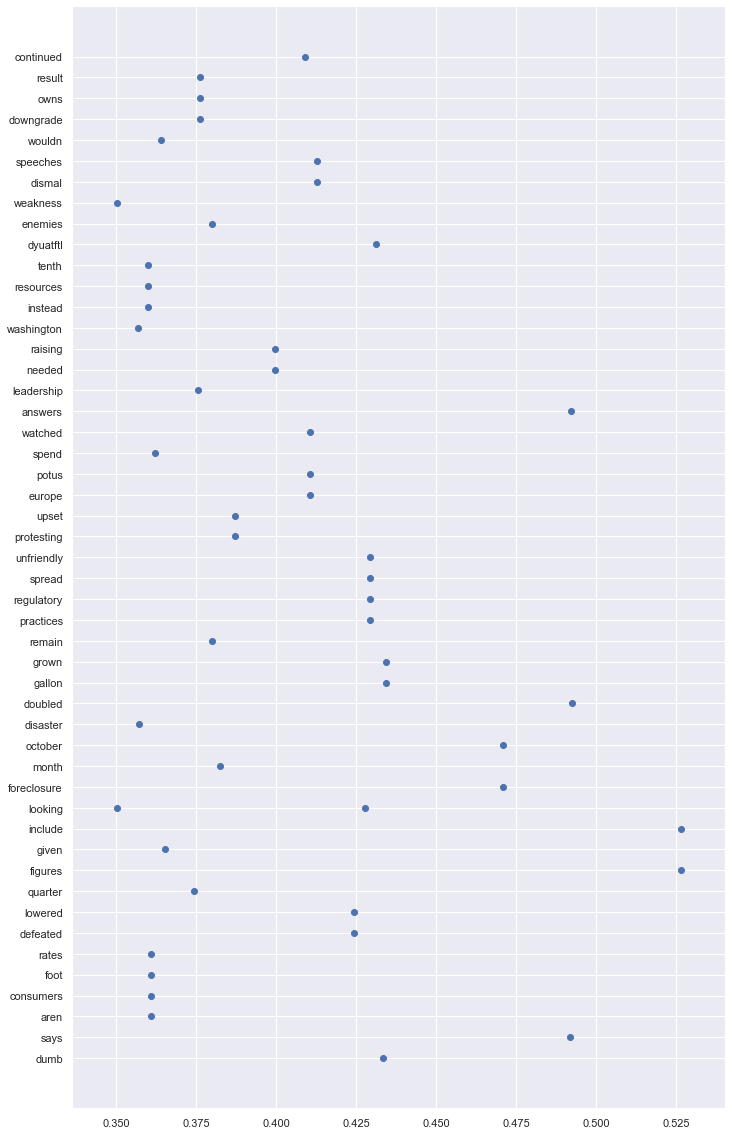

In [79]:
print("tf-idf weight of .35 is used to find topics")

categories=[]
for index in np.arange(len(corpus)):
    for item in tfidf[corpus[index]]:
        #print(dictionary.get(item[0]),item[1])
        word=dictionary.get(item[0])
        if item[1]>0.35 and (word not in stopwords) and (word not in ignore_words):
            #categories.append(dictionary.get(item[0]))
            categories.append(item)

categories=sorted(categories[:50])
words=[dictionary.get(item[0]) for item in categories]
values=[item[1] for item in categories]
#print(words)    
plt.scatter(values,words)
plt.show()


Using Named Entity Recogntion to answer: who, what, when and where 


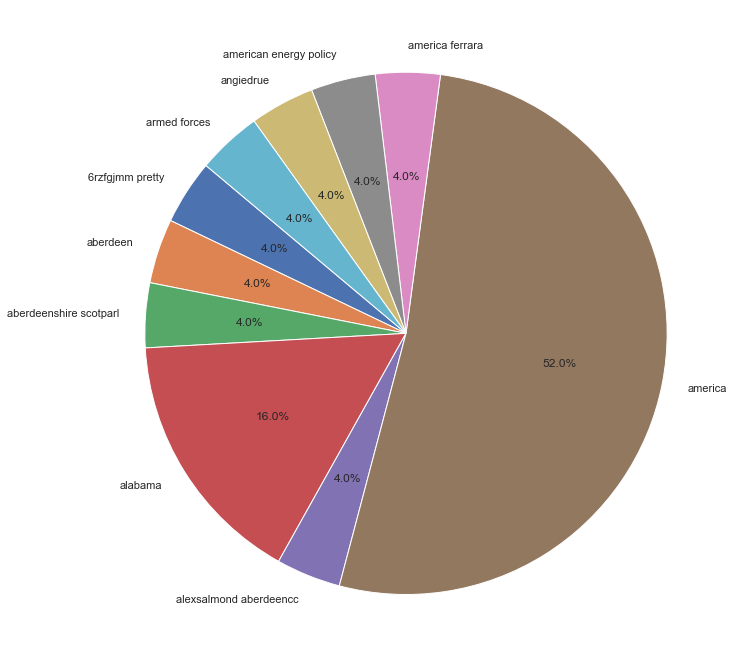

In [62]:
print('Using Spacy Named Entity Recogntion to answer: who, what, when and where ')

topics=dict()
for sentence in sentences:
    doc=nlp(sentence)

    named_entity=[(entity.text,entity.label_) for entity in doc.ents]
    for entity in doc.ents:
        text=entity.text.lower()
        if len(entity.text)>3 and (text not in ignore_words) and (text not in stop_words):
            if (entity.label_=='PERSON') | (entity.label_=='ORG')| (entity.label_=='GPE'):
                if text not in topics:
                    topics[text]=1
                else:
                    topics[text]+=1
                
    #print(named_entity)
topics=dict(sorted(topics.items(), key=lambda item: item[0])[:10])
#for item in topics:
#    print(item,topics.get(item))
    
labels = list(topics)
#print(labels)
values = [topics.get(v) for v in labels]
# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()    

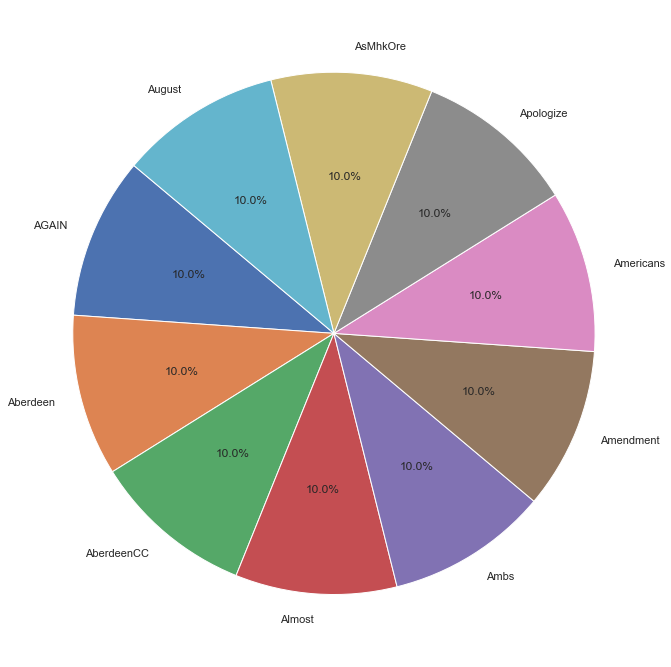

In [63]:
#nltk.download()
#nltk.download starts a large download of data: all, all-corpora, all-nltk, book, popular,test, and thirdparty

print("Using nltk to find topics from the sentences")

ner_categories = dict()
for sentence in sentences:
    tokenized_sent=nltk.word_tokenize(sentence)
    tagged_sent=nltk.pos_tag(tokenized_sent)
    chunked_sentence=nltk.ne_chunk(tagged_sent)
    for chunk in chunked_sentence:
        if len(chunk)>1:
            label=chunk[1]
            word=chunk[0]
            if len(word)>3 and (word not in stopwords) and (word not in ignore_words):
                if ((label== "NN") or (label== "NNP")or (label== "NNS") or (label== "NNPS")):
                    if word not in ner_categories:
                        ner_categories[word]=1
                    else:
                        ner_categories[word]=+1

ner_categories=dict(sorted(ner_categories.items(), key=lambda item: item[0])[:10])

labels = list(ner_categories)
#print(labels)
values = [ner_categories.get(v) for v in labels]
# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()